# 图像分类数据集

MNIST数据集
是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。
我们将使用类似但更复杂的Fashion-MNIST数据集

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中

In [2]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

0.1%

0.2%

0.4%

0.5%

0.6%

0.7%

0.9%

1.0%

1.1%

1.2%

1.4%

1.5%

1.6%

1.7%

1.9%

2.0%

2.1%

2.2%

2.4%

2.5%

2.6%

2.7%

2.9%

3.0%

3.1%

3.2%

3.3%

3.5%

3.6%

3.7%

3.8%

4.0%

4.1%

4.2%

4.3%

4.5%

4.6%

4.7%

4.8%

5.0%

5.1%

5.2%

5.3%

5.5%

5.6%

5.7%

5.8%

6.0%

6.1%

6.2%

6.3%

6.4%

6.6%

6.7%

6.8%

6.9%

7.1%

7.2%

7.3%

7.4%

7.6%

7.7%

7.8%

7.9%

8.1%

8.2%

8.3%

8.4%

8.6%

8.7%

8.8%

8.9%

9.1%

9.2%

9.3%

9.4%

9.5%

9.7%

9.8%

9.9%

10.0%

10.2%

10.3%

10.4%

10.5%

10.7%

10.8%

10.9%

11.0%

11.2%

11.3%

11.4%

11.5%

11.7%

11.8%

11.9%

12.0%

12.2%

12.3%

12.4%

12.5%

12.6%

12.8%

12.9%

13.0%

13.1%

13.3%

13.4%

13.5%

13.6%

13.8%

13.9%

14.0%

14.1%

14.3%

14.4%

14.5%

14.6%

14.8%

14.9%

15.0%

15.1%

15.3%

15.4%

15.5%

15.6%

15.8%

15.9%

16.0%

16.1%

16.2%

16.4%

16.5%

16.6%

16.7%

16.9%

17.0%

17.1%

17.2%

17.4%

17.5%

17.6%

17.7%

17.9%

18.0%

18.1%

18.2%

18.4%

18.5%

18.6%

18.7%

18.9%

19.0%

19.1%

19.2%

19.3%

19.5%

19.6%

19.7%

19.8%

20.0%

20.1%

20.2%

20.3%

20.5%

20.6%

20.7%

20.8%

21.0%

21.1%

21.2%

21.3%

21.5%

21.6%

21.7%

21.8%

22.0%

22.1%

22.2%

22.3%

22.4%

22.6%

22.7%

22.8%

22.9%

23.1%

23.2%

23.3%

23.4%

23.6%

23.7%

23.8%

23.9%

24.1%

24.2%

24.3%

24.4%

24.6%

24.7%

24.8%

24.9%

25.1%

25.2%

25.3%

25.4%

25.5%

25.7%

25.8%

25.9%

26.0%

26.2%

26.3%

26.4%

26.5%

26.7%

26.8%

26.9%

27.0%

27.2%

27.3%

27.4%

27.5%

27.7%

27.8%

27.9%

28.0%

28.2%

28.3%

28.4%

28.5%

28.6%

28.8%

28.9%

29.0%

29.1%

29.3%

29.4%

29.5%

29.6%

29.8%

29.9%

30.0%

30.1%

30.3%

30.4%

30.5%

30.6%

30.8%

30.9%

31.0%

31.1%

31.3%

31.4%

31.5%

31.6%

31.7%

31.9%

32.0%

32.1%

32.2%

32.4%

32.5%

32.6%

32.7%

32.9%

33.0%

33.1%

33.2%

33.4%

33.5%

33.6%

33.7%

33.9%

34.0%

34.1%

34.2%

34.4%

34.5%

34.6%

34.7%

34.8%

35.0%

35.1%

35.2%

35.3%

35.5%

35.6%

35.7%

35.8%

36.0%

36.1%

36.2%

36.3%

36.5%

36.6%

36.7%

36.8%

37.0%

37.1%

37.2%

37.3%

37.5%

37.6%

37.7%

37.8%

37.9%

38.1%

38.2%

38.3%

38.4%

38.6%

38.7%

38.8%

38.9%

39.1%

39.2%

39.3%

39.4%

39.6%

39.7%

39.8%

39.9%

40.1%

40.2%

40.3%

40.4%

40.6%

40.7%

40.8%

40.9%

41.1%

41.2%

41.3%

41.4%

41.5%

41.7%

41.8%

41.9%

42.0%

42.2%

42.3%

42.4%

42.5%

42.7%

42.8%

42.9%

43.0%

43.2%

43.3%

43.4%

43.5%

43.7%

43.8%

43.9%

44.0%

44.2%

44.3%

44.4%

44.5%

44.6%

44.8%

44.9%

45.0%

45.1%

45.3%

45.4%

45.5%

45.6%

45.8%

45.9%

46.0%

46.1%

46.3%

46.4%

46.5%

46.6%

46.8%

46.9%

47.0%

47.1%

47.3%

47.4%

47.5%

47.6%

47.7%

47.9%

48.0%

48.1%

48.2%

48.4%

48.5%

48.6%

48.7%

48.9%

49.0%

49.1%

49.2%

49.4%

49.5%

49.6%

49.7%

49.9%

50.0%

50.1%

50.2%

50.4%

50.5%

50.6%

50.7%

50.8%

51.0%

51.1%

51.2%

51.3%

51.5%

51.6%

51.7%

51.8%

52.0%

52.1%

52.2%

52.3%

52.5%

52.6%

52.7%

52.8%

53.0%

53.1%

53.2%

53.3%

53.5%

53.6%

53.7%

53.8%

53.9%

54.1%

54.2%

54.3%

54.4%

54.6%

54.7%

54.8%

54.9%

55.1%

55.2%

55.3%

55.4%

55.6%

55.7%

55.8%

55.9%

56.1%

56.2%

56.3%

56.4%

56.6%

56.7%

56.8%

56.9%

57.0%

57.2%

57.3%

57.4%

57.5%

57.7%

57.8%

57.9%

58.0%

58.2%

58.3%

58.4%

58.5%

58.7%

58.8%

58.9%

59.0%

59.2%

59.3%

59.4%

59.5%

59.7%

59.8%

59.9%

60.0%

60.1%

60.3%

60.4%

60.5%

60.6%

60.8%

60.9%

61.0%

61.1%

61.3%

61.4%

61.5%

61.6%

61.8%

61.9%

62.0%

62.1%

62.3%

62.4%

62.5%

62.6%

62.8%

62.9%

63.0%

63.1%

63.2%

63.4%

63.5%

63.6%

63.7%

63.9%

64.0%

64.1%

64.2%

64.4%

64.5%

64.6%

64.7%

64.9%

65.0%

65.1%

65.2%

65.4%

65.5%

65.6%

65.7%

65.9%

66.0%

66.1%

66.2%

66.3%

66.5%

66.6%

66.7%

66.8%

67.0%

67.1%

67.2%

67.3%

67.5%

67.6%

67.7%

67.8%

68.0%

68.1%

68.2%

68.3%

68.5%

68.6%

68.7%

68.8%

69.0%

69.1%

69.2%

69.3%

69.5%

69.6%

69.7%

69.8%

69.9%

70.1%

70.2%

70.3%

70.4%

70.6%

70.7%

70.8%

70.9%

71.1%

71.2%

71.3%

71.4%

71.6%

71.7%

71.8%

71.9%

72.1%

72.2%

72.3%

72.4%

72.6%

72.7%

72.8%

72.9%

73.0%

73.2%

73.3%

73.4%

73.5%

73.7%

73.8%

73.9%

74.0%

74.2%

74.3%

74.4%

74.5%

74.7%

74.8%

74.9%

75.0%

75.2%

75.3%

75.4%

75.5%

75.7%

75.8%

75.9%

76.0%

76.1%

76.3%

76.4%

76.5%

76.6%

76.8%

76.9%

77.0%

77.1%

77.3%

77.4%

77.5%

77.6%

77.8%

77.9%

78.0%

78.1%

78.3%

78.4%

78.5%

78.6%

78.8%

78.9%

79.0%

79.1%

79.2%

79.4%

79.5%

79.6%

79.7%

79.9%

80.0%

80.1%

80.2%

80.4%

80.5%

80.6%

80.7%

80.9%

81.0%

81.1%

81.2%

81.4%

81.5%

81.6%

81.7%

81.9%

82.0%

82.1%

82.2%

82.3%

82.5%

82.6%

82.7%

82.8%

83.0%

83.1%

83.2%

83.3%

83.5%

83.6%

83.7%

83.8%

84.0%

84.1%

84.2%

84.3%

84.5%

84.6%

84.7%

84.8%

85.0%

85.1%

85.2%

85.3%

85.4%

85.6%

85.7%

85.8%

85.9%

86.1%

86.2%

86.3%

86.4%

86.6%

86.7%

86.8%

86.9%

87.1%

87.2%

87.3%

87.4%

87.6%

87.7%

87.8%

87.9%

88.1%

88.2%

88.3%

88.4%

88.5%

88.7%

88.8%

88.9%

89.0%

89.2%

89.3%

89.4%

89.5%

89.7%

89.8%

89.9%

90.0%

90.2%

90.3%

90.4%

90.5%

90.7%

90.8%

90.9%

91.0%

91.2%

91.3%

91.4%

91.5%

91.6%

91.8%

91.9%

92.0%

92.1%

92.3%

92.4%

92.5%

92.6%

92.8%

92.9%

93.0%

93.1%

93.3%

93.4%

93.5%

93.6%

93.8%

93.9%

94.0%

94.1%

94.3%

94.4%

94.5%

94.6%

94.8%

94.9%

95.0%

95.1%

95.2%

95.4%

95.5%

95.6%

95.7%

95.9%

96.0%

96.1%

96.2%

96.4%

96.5%

96.6%

96.7%

96.9%

97.0%

97.1%

97.2%

97.4%

97.5%

97.6%

97.7%

97.9%

98.0%

98.1%

98.2%

98.3%

98.5%

98.6%

98.7%

98.8%

99.0%

99.1%

99.2%

99.3%

99.5%

99.6%

99.7%

99.8%

100.0%

100.0%

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


100.0%

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



0.7%

1.5%

2.2%

3.0%

3.7%

4.4%

5.2%

5.9%

6.7%

7.4%

8.2%

8.9%

9.6%

10.4%

11.1%

11.9%

12.6%

13.3%

14.1%

14.8%

15.6%

16.3%

17.0%

17.8%

18.5%

19.3%

20.0%

20.7%

21.5%

22.2%

23.0%

23.7%

24.5%

25.2%

25.9%

26.7%

27.4%

28.2%

28.9%

29.6%

30.4%

31.1%

31.9%

32.6%

33.3%

34.1%

34.8%

35.6%

36.3%

37.1%

37.8%

38.5%

39.3%

40.0%

40.8%

41.5%

42.2%

43.0%

43.7%

44.5%

45.2%

45.9%

46.7%

47.4%

48.2%

48.9%

49.6%

50.4%

51.1%

51.9%

52.6%

53.4%

54.1%

54.8%

55.6%

56.3%

57.1%

57.8%

58.5%

59.3%

60.0%

60.8%

61.5%

62.2%

63.0%

63.7%

64.5%

65.2%

65.9%

66.7%

67.4%

68.2%

68.9%

69.7%

70.4%

71.1%

71.9%

72.6%

73.4%

74.1%

74.8%

75.6%

76.3%

77.1%

77.8%

78.5%

79.3%

80.0%

80.8%

81.5%

82.3%

83.0%

83.7%

84.5%

85.2%

86.0%

86.7%

87.4%

88.2%

88.9%

89.7%

90.4%

91.1%

91.9%

92.6%

93.4%

94.1%

94.8%

95.6%

96.3%

97.1%

97.8%

98.6%

99.3%

100.0%

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [4]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

两个可视化数据集的函数

In [6]:
def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

几个样本的图像及其相应的标签

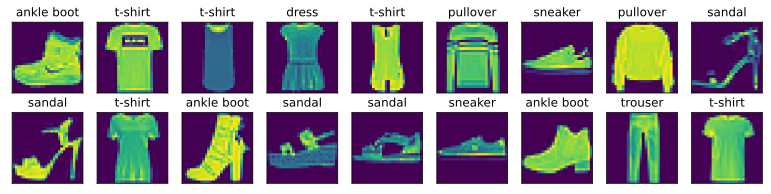

In [7]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

读取一小批量数据，大小为`batch_size`

In [9]:
batch_size = 256

def get_dataloader_workers():  
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'2.18 sec'

定义`load_data_fashion_mnist`函数

In [11]:
def load_data_fashion_mnist(batch_size, resize=None):  
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
